In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [2]:
print("train dataset shape: ", train_images.shape, train_labels.shape)
print("test dataset shape: ", test_images.shape, test_labels.shape)

train dataset shape:  (50000, 32, 32, 3) (50000, 1)
test dataset shape:  (10000, 32, 32, 3) (10000, 1)


In [5]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [3]:
NAMES = np.array(['airplaen', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


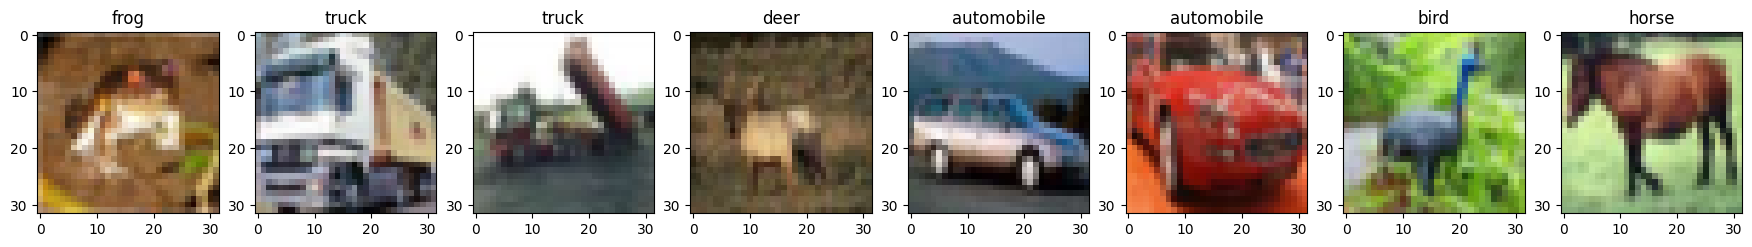

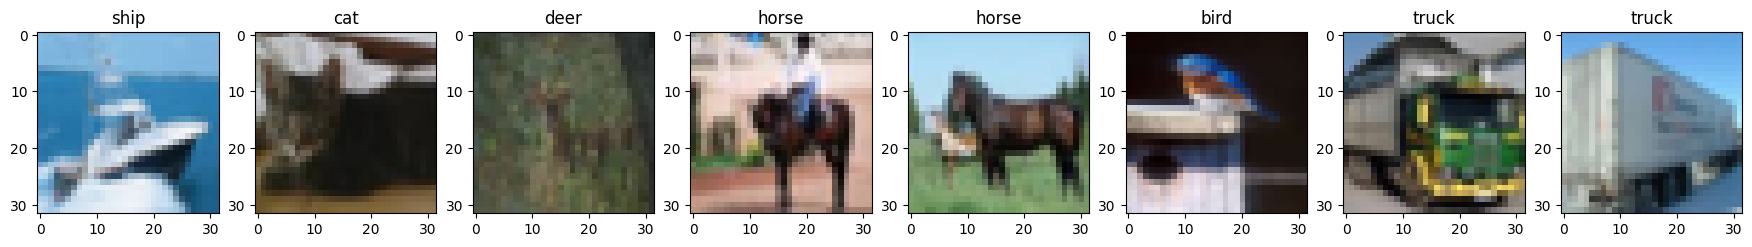

In [5]:
# cifer10 데이터 시각화
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_images(images, labels, ncols=0):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [6]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    return images, labels
train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [7]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
IMAGE_SIZE = 32

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [11]:
x = Conv2D(filters=32, kernel_size=(5, 5), padding="valid", activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3,), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3,), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation="softmax", name='output')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                             

In [12]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 53s 78ms/step - loss: 1.8693 - accuracy: 0.2992 - val_loss: 1.5444 - val_accuracy: 0.4284
Epoch 2/30
665/665 [==============================] - 53s 80ms/step - loss: 1.3933 - accuracy: 0.4918 - val_loss: 1.2129 - val_accuracy: 0.5531
Epoch 3/30
665/665 [==============================] - 54s 81ms/step - loss: 1.1777 - accuracy: 0.5765 - val_loss: 1.0264 - val_accuracy: 0.6377
Epoch 4/30
665/665 [==============================] - 54s 81ms/step - loss: 1.0336 - accuracy: 0.6357 - val_loss: 0.9867 - val_accuracy: 0.6508
Epoch 5/30
665/665 [==============================] - 53s 80ms/step - loss: 0.9407 - accuracy: 0.6685 - val_loss: 0.8619 - val_accuracy: 0.6920
Epoch 6/30
665/665 [==============================] - 54s 81ms/step - loss: 0.8493 - accuracy: 0.7013 - val_loss: 0.7992 - val_accuracy: 0.7152
Epoch 7/30
665/665 [==============================] - 54s 81ms/step - loss: 0.7843 - accuracy: 0.7237 - val_loss: 0.7808 - val_accuracy:

313/313 [==============================] - 3s 9ms/step - loss: 0.7960 - accuracy: 0.7679


[0.7960129380226135, 0.7678999900817871]

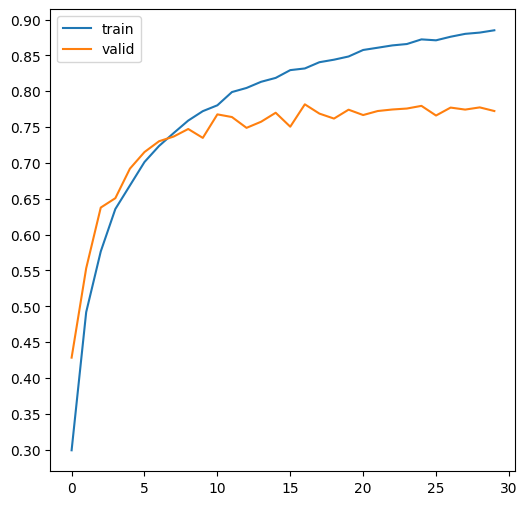

In [14]:
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)
model.evaluate(test_images, test_labels)

preds = model.predict(np.expand_dims(test_images[0], axis=0))
print("예측결과: shape:", preds.shape)
print("예측결과: ", preds)

In [15]:
preds = model.predict(test_images[:32], batch_size=32)
print("예측결과: shape:", preds.shape)
print("예측결과: ", preds)
predicted_class = np.argmax(preds, axis=1)
print(predicted_class)

1/1 [==============================] - 0s 98ms/step
예측결과: shape: (32, 10)
예측결과:  [[3.06620542e-03 1.75869267e-04 2.64339056e-02 5.45621991e-01
  2.00653821e-03 3.75553697e-01 1.86021812e-02 1.67246163e-02
  3.02875240e-04 1.15120951e-02]
 [7.66497337e-08 9.99708354e-01 1.40094071e-17 2.87916239e-18
  1.18441173e-20 7.01987069e-21 1.09378738e-17 5.76063089e-23
  5.03577530e-06 2.86501658e-04]
 [1.89172775e-01 3.09481435e-02 3.97939188e-03 5.36336191e-03
  6.71019254e-04 5.07613469e-04 5.28621627e-03 5.04331547e-04
  7.02738464e-01 6.08287193e-02]
 [8.59372914e-01 2.33740150e-03 2.97325285e-04 5.31694095e-04
  2.64340662e-04 6.15885729e-05 7.47647482e-06 2.99066123e-05
  1.33302033e-01 3.79543914e-03]
 [1.27578486e-11 4.33349044e-07 6.25709072e-05 4.29394640e-06
  3.50188238e-05 1.15084404e-08 9.99897599e-01 1.39341733e-11
  2.31233116e-10 1.57547275e-09]
 [8.42736063e-06 2.36618635e-05 7.57275661e-03 9.79517400e-02
  4.12112568e-03 6.68820292e-02 8.22625160e-01 2.67259253e-04
  1.163625

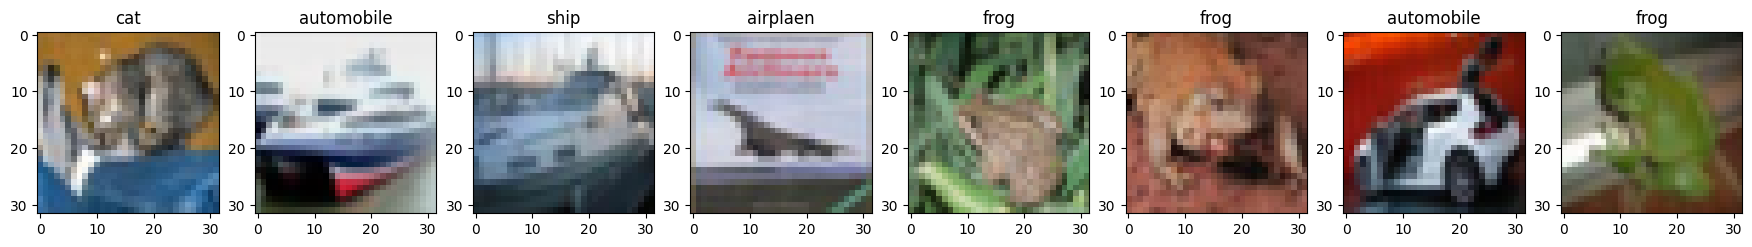

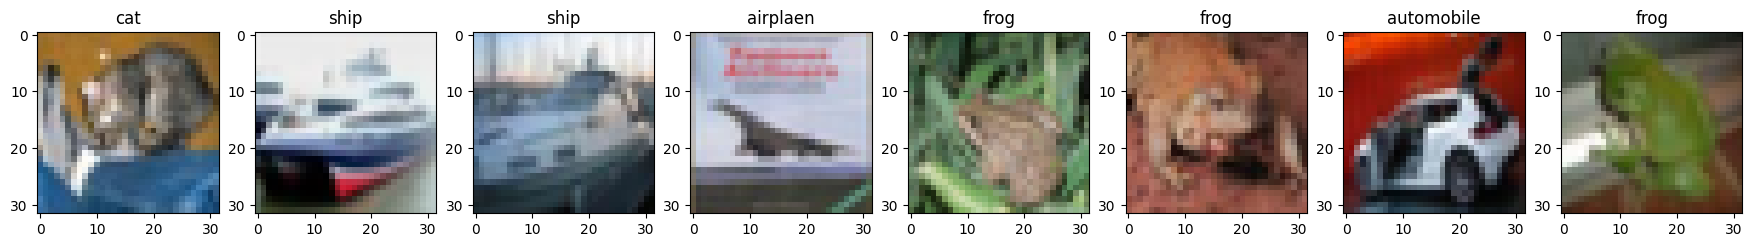

In [16]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)

In [17]:
from tensorflow.keras.utils import to_categorical

def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    return images, labels

def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    
    oh_labels = to_categorical(labels)
    return images, oh_labels

In [18]:
train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000,)
